# Plotting Colormaps

You can use colormaps to colour your network plots in order to get a quick and simple overview of line loadings and bus voltages. The plotting module provides functions to easily modify your bus and line collections. It also provides colourbars to match the colourcodes to the according numerical values.

### Continuous Colormaps

First, we load the network and run a loadflow to retrieve results:

In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
%matplotlib inline

net = nw.mv_oberrhein()
pp.runpp(net)

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


The pandapower plotting package contains convenience functions to create common colorbars and norms. We use the cmap_continuous function to get a linear colormap with color centers green at 20%, yellow at 50% and red at 60% line loading:

In [2]:
cmap_list=[(20, "green"), (50, "yellow"), (60, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)

The colormap and norm are now passend to the create_bus_collection function and the collection is plotted with draw_collections:

<Axes: >

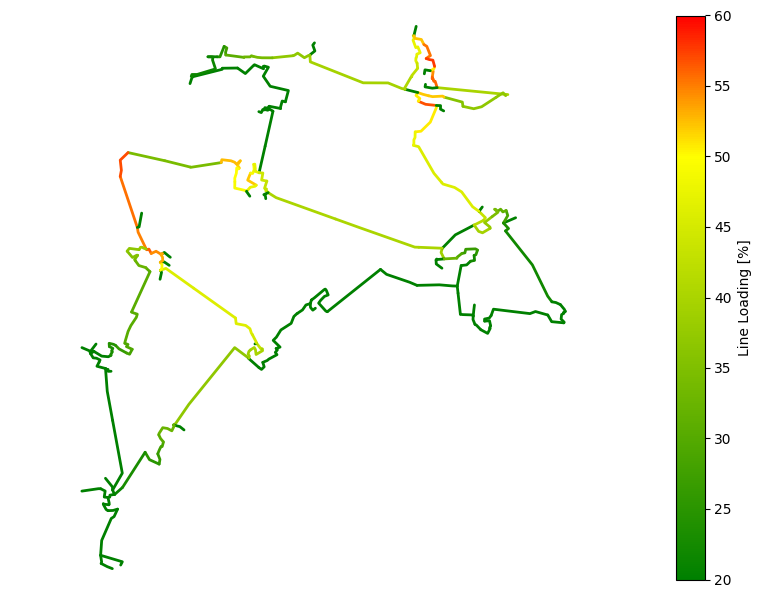

In [3]:
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc], figsize=(8,6))

<Axes: >

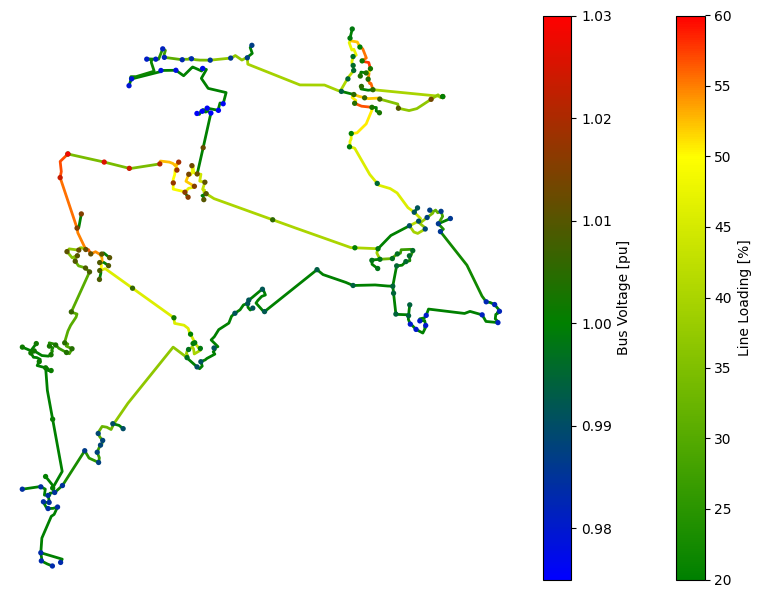

In [4]:
cmap_list=[(0.975, "blue"), (1.0, "green"), (1.03, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2, cmap=cmap, norm=norm)
plot.draw_collections([lc, bc], figsize=(8,6))

### Discrete Colormaps

Discrete colormaps can be used in the same way as continuous colormaps using the cmap_voltage_discrete and cmap_loading_discrete functions. For discrete colormaps, each color has to be assigned a range instead of a center:

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


<Axes: >

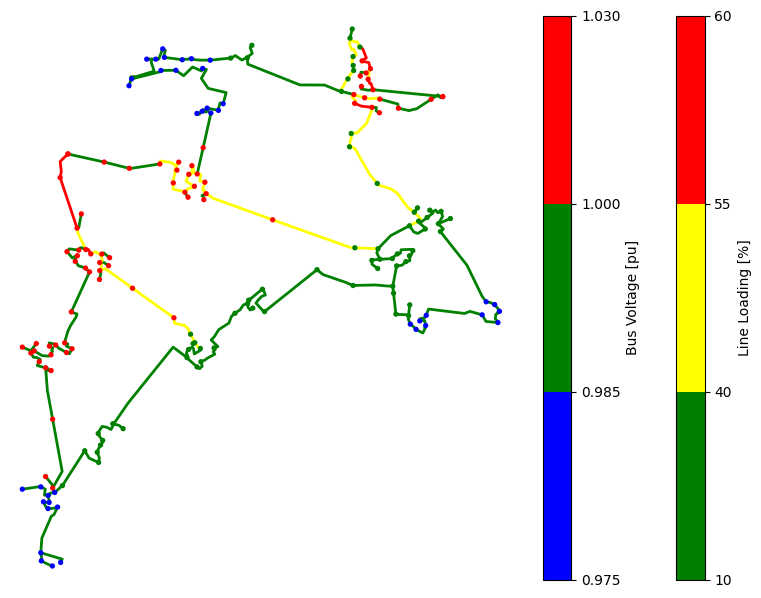

In [5]:
net = nw.mv_oberrhein()
pp.runpp(net)
cmap_list=[((0.975, 0.985), "blue"), ((0.985, 1.0), "green"), ((1.0, 1.03), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2, cmap=cmap, norm=norm)

cmap_list=[((10, 40), "green"), ((40, 55), "yellow"), ((55, 60), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc, bc], figsize=(8,6))

### Logarithmic Colormaps

This option can be used to create logarithmic colormaps. The intermediate values of the logarithmic scale are created automatically based on the minimum an maximum given values in analogy to the LogNorm. The colormap itself has a linear segmentation of the given colors. Also, it can only be used with at least 3 colors an increasing values which have to be above 0. 

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)
numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


<Axes: >

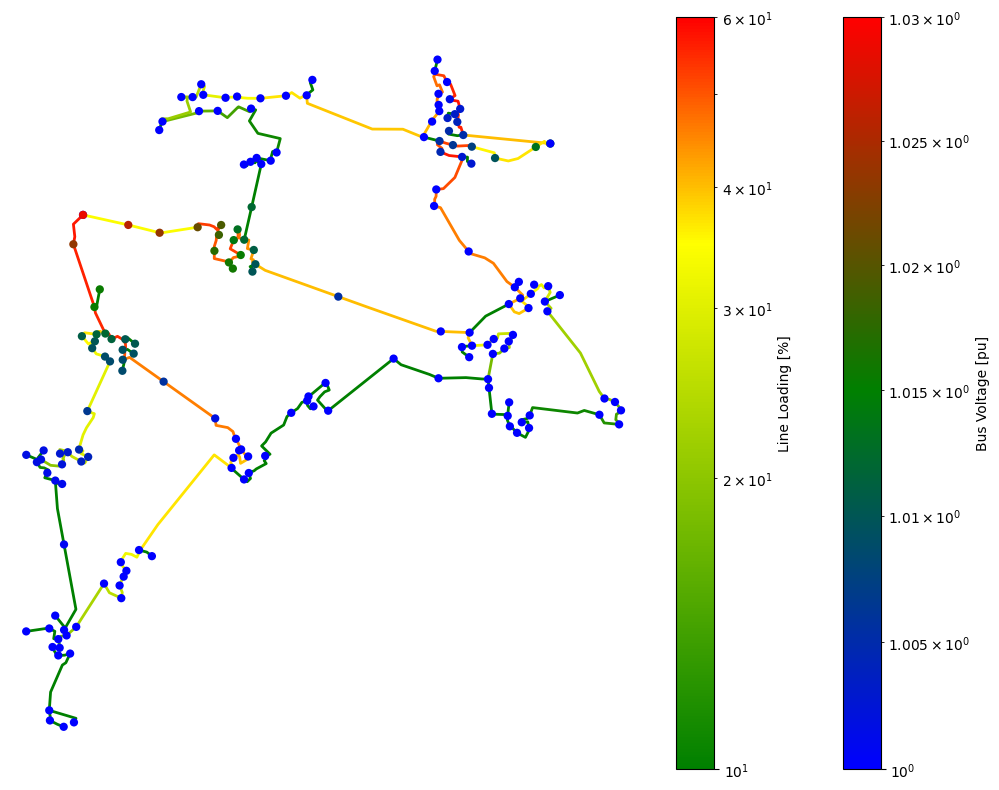

In [6]:
net = nw.mv_oberrhein()
pp.runpp(net)

min_value = 1.0
max_value = 1.03
colors = ["blue", "green", "red"]
cmap, norm = plot.cmap_logarithmic(min_value, max_value, colors)
bc = plot.create_bus_collection(net, size=100, cmap=cmap, norm=norm, zorder=2)

min_value = 10
max_value = 60
colors = ["green", "yellow", "red"]
cmap, norm = plot.cmap_logarithmic(min_value, max_value, colors)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidth=2)

plot.draw_collections([bc, lc])

## Custom Colormaps and Colorbars

The functions to create colormaps and norms are merely convenience functions. You can individually create any colormap you like and pass it to the create_collection functions.

For example, for the colorbar "PuBu_r" from matplotlib:

<Axes: >

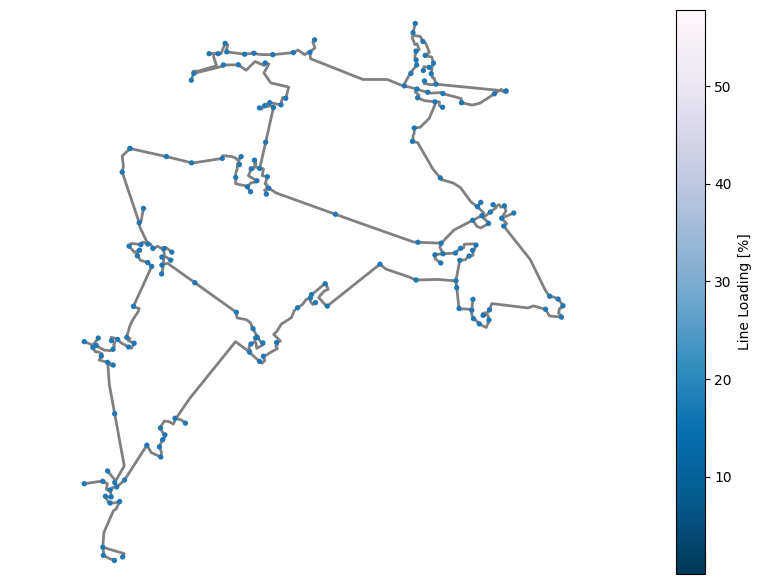

In [7]:
from matplotlib.pyplot import get_cmap
from matplotlib.colors import Normalize

cmap = get_cmap('PuBu_r')
lc = plot.create_line_collection(net, net.line.index, zorder=1, color="grey", linewidths=2,
                                     cmap=cmap)
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2)
plot.draw_collections([lc, bc], figsize=(8,6))

Plotting without a norm maps the colorbar to the range of the data points (here: line loadings). Normalizing to values between 20 and 100 yields:

<Axes: >

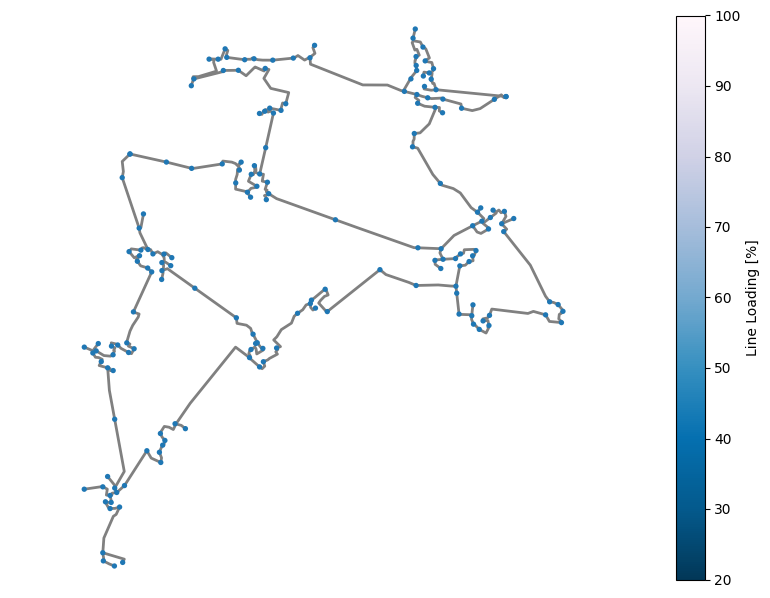

In [8]:
cmap = get_cmap('PuBu_r')
norm = Normalize(vmin=20, vmax=100)
lc = plot.create_line_collection(net, net.line.index, zorder=1, color="grey", linewidths=2,
                                     cmap=cmap, norm=norm)
bc = plot.create_bus_collection(net, net.bus.index, size=80, zorder=2)
plot.draw_collections([lc, bc], figsize=(8,6))

The colorbar can be customized by disabling the automatic plotting of the colorbar in draw_collections and plotting the colorbar directly with the desired parameters:

Text(0, 0.5, 'This is a individual colorbar title')

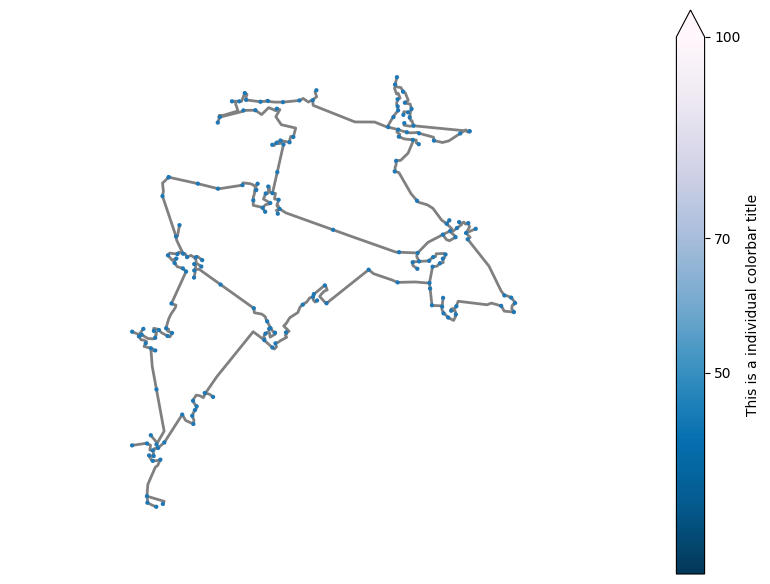

In [9]:
from matplotlib.pyplot import colorbar

ax = plot.draw_collections([lc, bc], figsize=(8,6), plot_colorbars=False)
cbar = colorbar(lc, ax=ax, extend="max")
cbar.set_ticks([50, 70, 100])
cbar.ax.set_ylabel("This is a individual colorbar title")